Họ tên: Nguyễn Văn Bắc                    MSV: 102220005

[Link drive chưa model](https://drive.google.com/file/d/1t7ldPvEJpVeO0Ee3HO-o4vKBWjhvFMRr/view?usp=drive_link)

[Link colab train model](https://drive.google.com/file/d/1siK1TZ_1rBfWWvZQUEDGJ2Zhn3d4NoJJ/view?usp=drive_link)

# **Hướng dẫn**:
*note1: Không cần tải model, đã có sẵn hàm để load model từ drive

*note2: Các cell được ghi chú ở trên mỗi dòng code
1. Chạy cell 1 để tải model từ drive
2. Chạy cell 2 để load model (bắt buộc chạy cell 1 trước)
3. Chạy cell 3 để đoán ảnh từ một link ảnh bất kì (Thay link ảnh tại dòng code có comment/ghi chú) (bắt buộc chạy cell 1 và 2 lần lượt trước)
4. Chạy cell 4 để đoán ảnh trên tập dữ liệu cifar10 (Bắt buộc chạy trước cell1, 2, 3)

**Kết quả dự đoán của model**

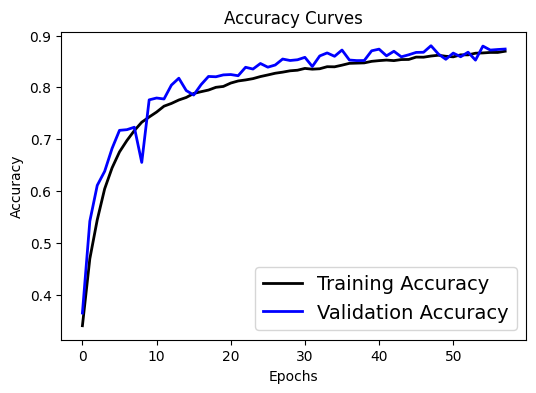

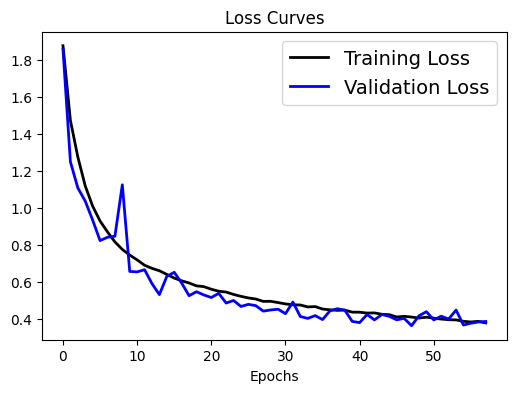

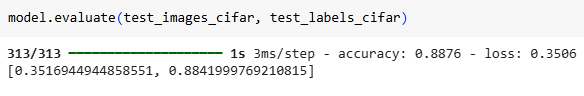

# **Cell 1**

In [1]:
import requests
import os

model_path = "/content/my_model.keras"

model_url = "https://raw.githubusercontent.com/stealavie/Cifar10/main/my_model.keras"

# Tải model từ GitHub
os.system(f"wget -O {model_path} {model_url}")

print("Model đã được tải")


Model đã được tải


# **Cell 2**

In [4]:
import tensorflow as tf
model = tf.keras.models.load_model("my_model.keras")

# **Cell 3**

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


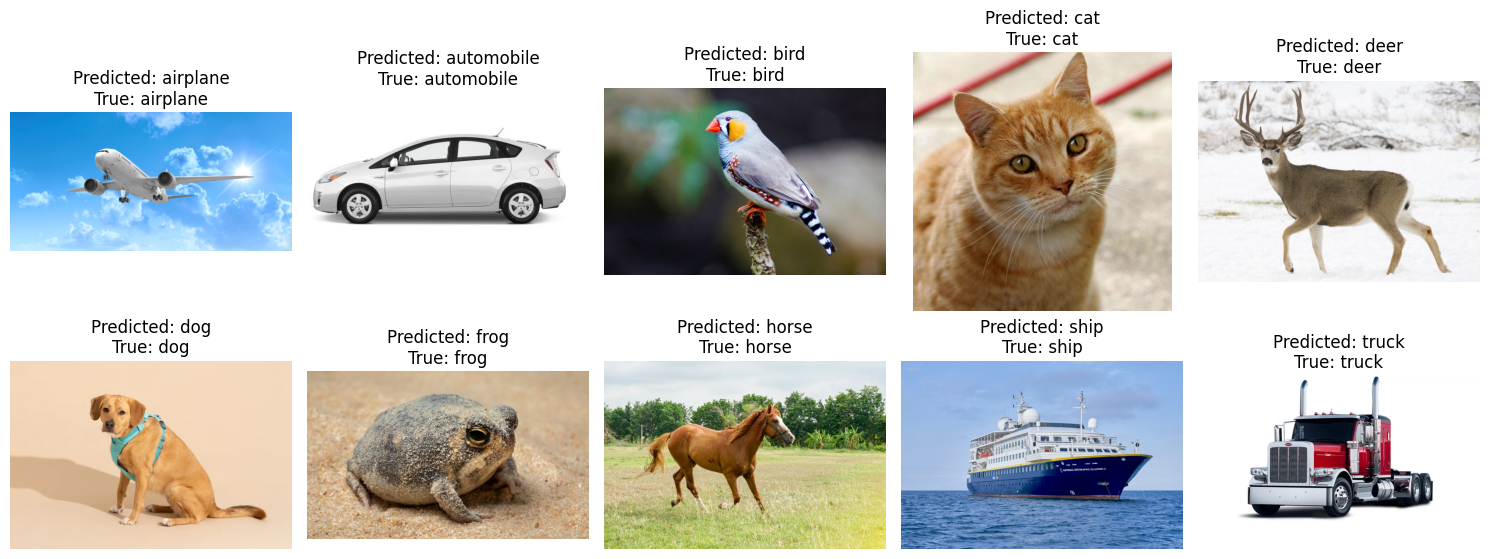

In [5]:
# function to read img from web url
import cv2
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

images_url = ["https://images.theconversation.com/files/578175/original/file-20240227-28-cejldv.jpg?ixlib=rb-4.1.0&rect=0%2C0%2C7668%2C3828&q=45&auto=format&w=1356&h=668&fit=crop", # airplane
              "https://themechanicalengineering.com/wp-content/uploads/2022/04/Types-or-Classification-of-Automobile.jpg", # automobile
              "https://cdn.britannica.com/10/250610-050-BC5CCDAF/Zebra-finch-Taeniopygia-guttata-bird.jpg", # bird
              "https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg", # cat
              "https://upload.wikimedia.org/wikipedia/commons/a/a7/Mule_buck_elk_creek_m_myatt_%285489214303%29.jpg", # deer
              "https://cdn.thewirecutter.com/wp-content/media/2021/03/dogharnesses-2048px-6907-1024x682.webp", # dog
              "https://cdn.wcs.org/2024/03/13/21/14/05/2d2c6f1b-71c4-4390-b7e2-deb21a0bc11f/shutterstock_2331893385.jpg", # frog
              "https://images.pexels.com/photos/6696645/pexels-photo-6696645.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1", # horse
              "https://www.nationalgeographic.com/content/dam/expeditions/transports/islander-ii/new-day-2-islander-ii-jan23-1000x666.jpg", # ship
              "https://www.peterbilt.com/static-assets/images/truck/589%20default%20image-white-bg.webp"] # truck

def read_image(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return np.array(img)

def pred_img(img):
    img_resize = tf.image.resize(img, (32,32))
    img_resize = np.array(img_resize)
    bilateral = cv2.bilateralFilter(img_resize, 9, 75, 75)
    gaussian = cv2.GaussianBlur(bilateral, (3, 3), 0.3)
    sharpened = cv2.addWeighted(img_resize, 1.5, gaussian, -0.5, 0)
    normailized = (sharpened - np.min(sharpened)) / (np.max(sharpened) - np.min(sharpened))
    normailized = np.expand_dims(normailized, axis=0)
    yhat = model.predict(normailized)
    pred_class = class_names[np.argmax(yhat)]
    return pred_class

preds = []
for img_url in images_url:
    img = read_image(img_url)
    pred_class = pred_img(img)
    preds.append(pred_class)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i, img_url in enumerate(images_url):
    img = read_image(img_url)
    axes[i].imshow(img)
    axes[i].set_title(f"Predicted: {preds[i]}\nTrue: {class_names[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Cell **4**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


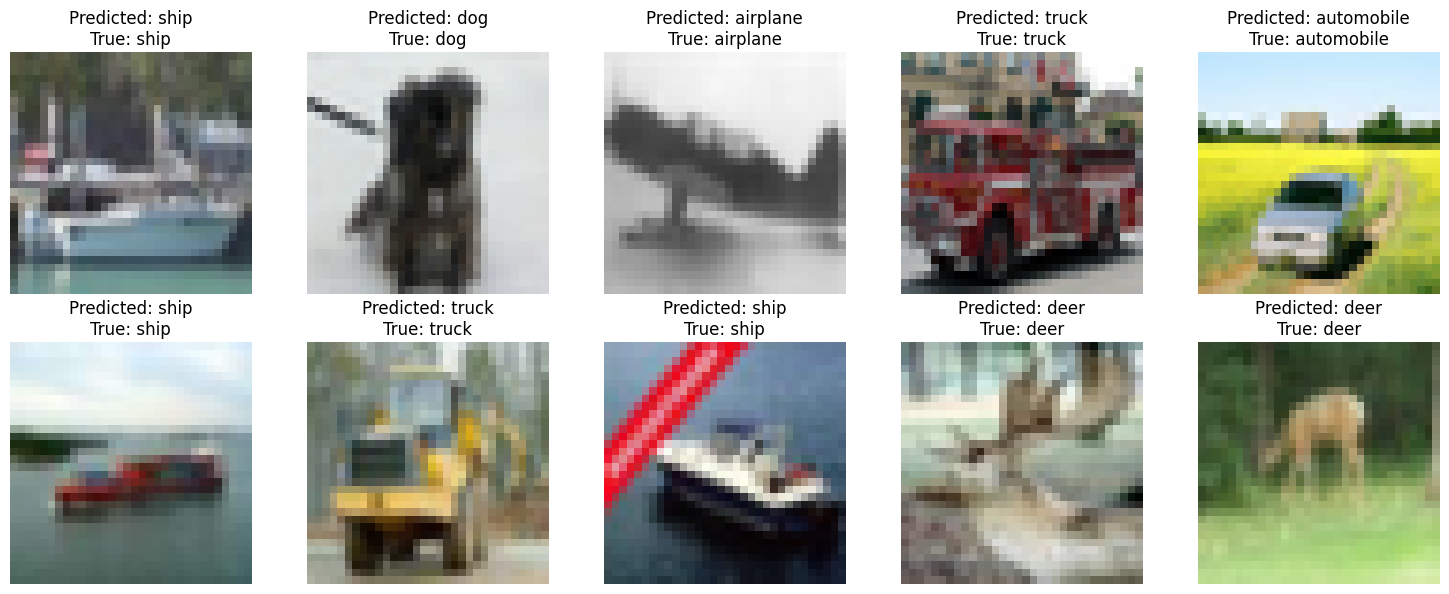

In [9]:
import tensorflow.keras.datasets as datasets

data = datasets.cifar10.load_data()
(x_train, y_train), (x_test, y_test) = data

indices = np.random.choice(len(x_test), size=10, replace=False)

imgs = x_test[indices]
labels = y_test[indices]
preds = []

for img in imgs:
    pred = pred_img(img)
    preds.append(pred)

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i, img in enumerate(imgs):
    axes[i].imshow(img)
    axes[i].set_title(f"Predicted: {preds[i]}\nTrue: {class_names[labels[i][0]]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()